# Flight Price Prediction
---

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Download the Dataset from following link

Link to [Dataset](https://www.kaggle.com/datasets/yashdharme36/airfare-ml-predicting-flight-fares?select=Scraped_dataset.csv)

## Import Dataset

1. Load the dataset using Pandas.
2. Observe few rows of the dataset carefully.
3. Ckeck for number of feature columns present in it.
4. Use df info() to check datatypes of all feature columns it also shows various info about dataset.
5. Ckeck for, if null values present in the dataset. 

In [2]:
# Load the dataset

flight = pd.read_csv('Scraped_dataset.csv')

In [3]:
# View the dataset 

flight.head(3)

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"


In [4]:
flight.columns

Index(['Date of Booking', 'Date of Journey', 'Airline-Class', 'Departure Time',
       'Arrival Time', 'Duration', 'Total Stops', 'Price'],
      dtype='object')

In [5]:
# Check for datatypes and other information

flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  452088 non-null  object
 1   Date of Journey  452088 non-null  object
 2   Airline-Class    452088 non-null  object
 3   Departure Time   452088 non-null  object
 4   Arrival Time     452088 non-null  object
 5   Duration         452088 non-null  object
 6   Total Stops      452088 non-null  object
 7   Price            452088 non-null  object
dtypes: object(8)
memory usage: 27.6+ MB


In [6]:
# Check for null values

flight.isnull().sum()

Date of Booking    0
Date of Journey    0
Airline-Class      0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

# EDA and Feature Engineering

### We will use RegEx, Pandas and Numpy together to clean the dataset and will make some new features using it

1. Extract Airline from Airline-Class
2. Extract Class from Airline-Class
3. Extract Source from Departure Time	
4. Extract Departure Hour and Min from Departure Time
5. Extract Destination from Arrival Time
6. Extract Arrival Hour and Min from Arrival Time
7. Convert Duration time in minutes
8. Convert Date of Journey into 2 separate features Journey Day and Journey Month
9. Convert Date of Booking into 2 separate features Booking Day and Booking Month

In [7]:
# Extract Airline from Airline-Class and make it a new feature

def airline(x):
    
    for item in re.finditer('([\w ]*)(\s)(\\n)',x):
        return item.group(1)
    

flight['Airline'] = flight['Airline-Class'].apply(airline)

In [8]:
# Extract Class from Airline-Class and make it a new feature

def Class(x):
     
        for item in re.finditer('([\w ]*)(\s)(\\n)([\w ]*)(\-)([\w ]*)(\\n)([\w ]*)',x):
            return item.group(8)

flight['Class'] = flight['Airline-Class'].apply(Class)

In [9]:
# Extract Source from Departure Time and make it a new feature

def source(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)(\\n)([\w ]*)', x):
        return item.group(5)
    

flight['Source'] = flight['Departure Time'].apply(source)

In [10]:
# Extract Destination from Arrival Time and make it a new feature

def destination(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)(\\n)([\w ]*)', x):
        return item.group(5)

flight['Destination'] = flight['Arrival Time'].apply(destination)

In [11]:
# Extract Dep Hour from Departure Time and make it a new feature

def Dep_Hour(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)', x):
        return item.group(1)
        

flight['Dep Hour'] = flight['Departure Time'].apply(Dep_Hour).astype(int)

In [12]:
# Extract Dep Min from Departure Time and make it a new feature

def Dep_Min(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)', x):
        return item.group(3)

flight['Dep Min'] = flight['Departure Time'].apply(Dep_Min).astype(int)

In [13]:
# Extract Arr Hour from Arrival Time and make it a new feature

def Arr_Hour(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)', x):
        return item.group(1)

flight['Arr Hour'] = flight['Arrival Time'].apply(Arr_Hour).astype(int)

In [14]:
# Extract Arr Min from Arrival Time and make it a new feature

def Arr_Min(x):
    
    for item in re.finditer('([\w ]*)(\:)([\w ]*)', x):
        return item.group(3)

flight['Arr Min'] = flight['Arrival Time'].apply(Arr_Min).astype(int)

In [15]:
# Delete following features after extracting information

del flight['Arrival Time']
del flight['Departure Time']
del flight['Airline-Class']

In [16]:
# Extract duration hour and min from Duration and convert it into Duration minutes

def Dur_hour(x):
    
    for item in re.finditer('([\w ]*)h', x):
        return item.group(1)
        

flight['Duration_Hour'] = flight['Duration'].apply(Dur_hour).astype(int)

def Dur_min(x):
    
    for item in re.finditer('([\w ]*)(h)(\s)([\w ]*)(m)', x):
        return item.group(4)
        

flight['Duration_Min'] = flight['Duration'].apply(Dur_min).astype(int)

# Delete following feature after extracting information

del flight['Duration']

# Create new Duration feature which shows Duration in minutes

flight['Duration'] = (flight['Duration_Hour']*60) + flight['Duration_Min']

# Delete following features after extracting information

del flight['Duration_Hour']  
del flight['Duration_Min']

In [17]:
# Convert Date of Booking into 2 separate features Booking Day and Booking Month

flight['Booking_Day'] = pd.to_datetime(flight['Date of Booking'], format='%d/%m/%Y').dt.day

flight['Booking_Month'] = pd.to_datetime(flight['Date of Booking'], format='%d/%m/%Y').dt.month



# Convert Date of Journey into 2 separate features Journey Day and Journey Month

flight['Journey_Day'] = pd.to_datetime(flight['Date of Journey'], format='%d/%m/%Y').dt.day

flight['Journey_Month'] = pd.to_datetime(flight['Date of Journey'], format='%d/%m/%Y').dt.month


# Delete following features after extracting information

del flight['Date of Booking']
del flight['Date of Journey']

In [18]:
flight.head()

,Total Stops,Price,Airline,Class,Source,Destination,Dep Hour,Dep Min,Arr Hour,Arr Min,Duration,Booking_Day,Booking_Month,Journey_Day,Journey_Month
0,non-stop,"5,335",SpiceJet,ECONOMY,Delhi,Mumbai,20,0,22,5,125,15,1,16,1
1,non-stop,"5,899",Indigo,ECONOMY,Delhi,Mumbai,23,0,1,20,140,15,1,16,1
2,non-stop,"5,801",GO FIRST,ECONOMY,Delhi,Mumbai,22,30,0,40,130,15,1,16,1
3,non-stop,"5,794",SpiceJet,ECONOMY,Delhi,Mumbai,18,50,20,55,125,15,1,16,1
4,non-stop,"5,955",Air India,ECONOMY,Delhi,Mumbai,20,0,22,10,130,15,1,16,1


In [19]:
flight.isnull().sum()

Total Stops      0
Price            0
Airline          0
Class            0
Source           0
Destination      0
Dep Hour         0
Dep Min          0
Arr Hour         0
Arr Min          0
Duration         0
Booking_Day      0
Booking_Month    0
Journey_Day      0
Journey_Month    0
dtype: int64

## Handling Categorical Data

Please refer this nice article on how to handle Categorical Data

https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

### One-Hot Encoding
One-Hot Encoding is the most common, correct way to deal with non-ordinal categorical data. It consists of creating an additional feature for each group of the categorical feature and mark each observation belonging (Value=1) or not (Value=0) to that group. 

#### We will use One-Hot Encoding for Airline, Class, Source and Destination feature.

### Label Encoding
One of the simplest and most common solutions advertised to transform categorical variables is Label Encoding. It consists of substituting each group with a corresponding number and keeping such numbering consistent throughout the feature.

#### We will use Label Encoding for Total stops feature.

In [20]:
# We will use One-Hot Encoding for Airline, Class, Source and Destination feature

Airline = pd.get_dummies(flight[['Airline']])
Class = pd.get_dummies(flight[['Class']])
Source = pd.get_dummies(flight[['Source']])
Destination = pd.get_dummies(flight[['Destination']])

In [21]:
Destination.head()

,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [22]:
# Join all dataframes

flight = pd.concat([flight, Airline, Class, Source, Destination], axis=1)


# Delete following features after extracting information

del flight['Airline']
del flight['Class']
del flight['Source']
del flight['Destination']

In [23]:
# check for unique values in Total stops

flight['Total Stops'].unique()

array(['non-stop', '1-stop', '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ'], dtype=object)

In [24]:
# We will use Label Encoding for Total stops feature

flight['Total Stops'].replace({'non-stop':0, '1-stop':1, '2+-stop':2,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune':1,
                              '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ':1}, inplace=True)

In [25]:
# Again check that label encoding works or not ?

flight['Total Stops'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
flight.head()

,Total Stops,Price,Dep Hour,Dep Min,Arr Hour,Arr Min,Duration,Booking_Day,Booking_Month,Journey_Day,...,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,"5,335",20,0,22,5,125,15,1,16,...,0,0,0,0,0,0,0,0,0,1
1,0,"5,899",23,0,1,20,140,15,1,16,...,0,0,0,0,0,0,0,0,0,1
2,0,"5,801",22,30,0,40,130,15,1,16,...,0,0,0,0,0,0,0,0,0,1
3,0,"5,794",18,50,20,55,125,15,1,16,...,0,0,0,0,0,0,0,0,0,1
4,0,"5,955",20,0,22,10,130,15,1,16,...,0,0,0,0,0,0,0,0,0,1


In [27]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Total Stops            452088 non-null  int64 
 1   Price                  452088 non-null  object
 2   Dep Hour               452088 non-null  int32 
 3   Dep Min                452088 non-null  int32 
 4   Arr Hour               452088 non-null  int32 
 5   Arr Min                452088 non-null  int32 
 6   Duration               452088 non-null  int32 
 7   Booking_Day            452088 non-null  int64 
 8   Booking_Month          452088 non-null  int64 
 9   Journey_Day            452088 non-null  int64 
 10  Journey_Month          452088 non-null  int64 
 11  Airline_Air India      452088 non-null  uint8 
 12  Airline_AirAsia        452088 non-null  uint8 
 13  Airline_AkasaAir       452088 non-null  uint8 
 14  Airline_AllianceAir    452088 non-null  uint8 
 15  

In [28]:
flight.isnull().sum()

Total Stops              0
Price                    0
Dep Hour                 0
Dep Min                  0
Arr Hour                 0
Arr Min                  0
Duration                 0
Booking_Day              0
Booking_Month            0
Journey_Day              0
Journey_Month            0
Airline_Air India        0
Airline_AirAsia          0
Airline_AkasaAir         0
Airline_AllianceAir      0
Airline_GO FIRST         0
Airline_Indigo           0
Airline_SpiceJet         0
Airline_StarAir          0
Airline_Vistara          0
Class_BUSINESS           0
Class_ECONOMY            0
Class_FIRST              0
Class_PREMIUMECONOMY     0
Source_Ahmedabad         0
Source_Bangalore         0
Source_Chennai           0
Source_Delhi             0
Source_Hyderabad         0
Source_Kolkata           0
Source_Mumbai            0
Destination_Ahmedabad    0
Destination_Bangalore    0
Destination_Chennai      0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
D

### As Price column has comma in it, direct conversion from str to int won't work here

In [29]:
flight['Price'] = flight['Price'].str.replace(',', '').astype(int)

In [30]:
flight.head()

,Total Stops,Price,Dep Hour,Dep Min,Arr Hour,Arr Min,Duration,Booking_Day,Booking_Month,Journey_Day,...,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,5335,20,0,22,5,125,15,1,16,...,0,0,0,0,0,0,0,0,0,1
1,0,5899,23,0,1,20,140,15,1,16,...,0,0,0,0,0,0,0,0,0,1
2,0,5801,22,30,0,40,130,15,1,16,...,0,0,0,0,0,0,0,0,0,1
3,0,5794,18,50,20,55,125,15,1,16,...,0,0,0,0,0,0,0,0,0,1
4,0,5955,20,0,22,10,130,15,1,16,...,0,0,0,0,0,0,0,0,0,1


In [31]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Total Stops            452088 non-null  int64
 1   Price                  452088 non-null  int32
 2   Dep Hour               452088 non-null  int32
 3   Dep Min                452088 non-null  int32
 4   Arr Hour               452088 non-null  int32
 5   Arr Min                452088 non-null  int32
 6   Duration               452088 non-null  int32
 7   Booking_Day            452088 non-null  int64
 8   Booking_Month          452088 non-null  int64
 9   Journey_Day            452088 non-null  int64
 10  Journey_Month          452088 non-null  int64
 11  Airline_Air India      452088 non-null  uint8
 12  Airline_AirAsia        452088 non-null  uint8
 13  Airline_AkasaAir       452088 non-null  uint8
 14  Airline_AllianceAir    452088 non-null  uint8
 15  Airline_GO FIRST 

In [32]:
flight.columns

Index(['Total Stops', 'Price', 'Dep Hour', 'Dep Min', 'Arr Hour', 'Arr Min',
       'Duration', 'Booking_Day', 'Booking_Month', 'Journey_Day',
       'Journey_Month', 'Airline_Air India', 'Airline_AirAsia',
       'Airline_AkasaAir', 'Airline_AllianceAir', 'Airline_GO FIRST',
       'Airline_Indigo', 'Airline_SpiceJet', 'Airline_StarAir',
       'Airline_Vistara', 'Class_BUSINESS', 'Class_ECONOMY', 'Class_FIRST',
       'Class_PREMIUMECONOMY', 'Source_Ahmedabad', 'Source_Bangalore',
       'Source_Chennai', 'Source_Delhi', 'Source_Hyderabad', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Ahmedabad', 'Destination_Bangalore',
       'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_Mumbai'],
      dtype='object')

In [33]:
# Separate out features(x) and target(y)

y = flight['Price']

x = flight[['Total Stops', 'Dep Hour', 'Dep Min', 'Arr Hour', 'Arr Min',
       'Journey_Day', 'Journey_Month', 'Booking_Day', 'Booking_Month',
       'Duration', 'Airline_Air India', 'Airline_AirAsia',
       'Airline_AkasaAir', 'Airline_AllianceAir', 'Airline_GO FIRST',
       'Airline_Indigo', 'Airline_SpiceJet', 'Airline_StarAir',
       'Airline_Vistara', 'Class_BUSINESS', 'Class_ECONOMY', 'Class_FIRST',
       'Class_PREMIUMECONOMY', 'Source_Ahmedabad', 'Source_Bangalore',
       'Source_Chennai', 'Source_Delhi', 'Source_Hyderabad', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Ahmedabad', 'Destination_Bangalore',
       'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_Mumbai']]

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Total Stops            452088 non-null  int64
 1   Dep Hour               452088 non-null  int32
 2   Dep Min                452088 non-null  int32
 3   Arr Hour               452088 non-null  int32
 4   Arr Min                452088 non-null  int32
 5   Journey_Day            452088 non-null  int64
 6   Journey_Month          452088 non-null  int64
 7   Booking_Day            452088 non-null  int64
 8   Booking_Month          452088 non-null  int64
 9   Duration               452088 non-null  int32
 10  Airline_Air India      452088 non-null  uint8
 11  Airline_AirAsia        452088 non-null  uint8
 12  Airline_AkasaAir       452088 non-null  uint8
 13  Airline_AllianceAir    452088 non-null  uint8
 14  Airline_GO FIRST       452088 non-null  uint8
 15  Airline_Indigo   

In [35]:
y

0          5335
1          5899
2          5801
3          5794
4          5955
          ...  
452083    65028
452084    69254
452085    69254
452086    72980
452087    72980
Name: Price, Length: 452088, dtype: int32

### Model fitting using XGBoost Regressor

#### For the Regression model, evaluation should be done using Mean Absolute Percentage Error

1. **Split** the **dataset** into **train** and **test** sets.
2. **XGBoost Regressor does not require any feature scaling.**
3. **Import** and **fit the model.**
4. **Evaluate** the **loss on mean absolute error.**
5. **Predict** for **test** data.
6. **Evaluate** the **mean absolute percentage error** between **y_test and y_pred.**
7. **Plot** the all samples from **y_test and y_pred.**
8. **Plot Feature Importance.**

In [36]:
# XGBoost Regressor

from xgboost import XGBRegressor

# Split the dataset in train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
# predict on test data

y_pred = model.predict(x_test)

# Evaluate mean absolute percentage error between y_test and y_pred.

from sklearn import metrics

MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)

Accuracy = 1 - MAPE

print('Percentage Accuracy for Test data is ' + str(Accuracy*100) + ' %')

print('\nMean Absolute Percentage Error for Test data is ' + str(MAPE*100) + ' %')

Percentage Accuracy for Test data is 85.64421174631931 %

Mean Absolute Percentage Error for Test data is 14.35578825368069 %


<IPython.core.display.Javascript object>


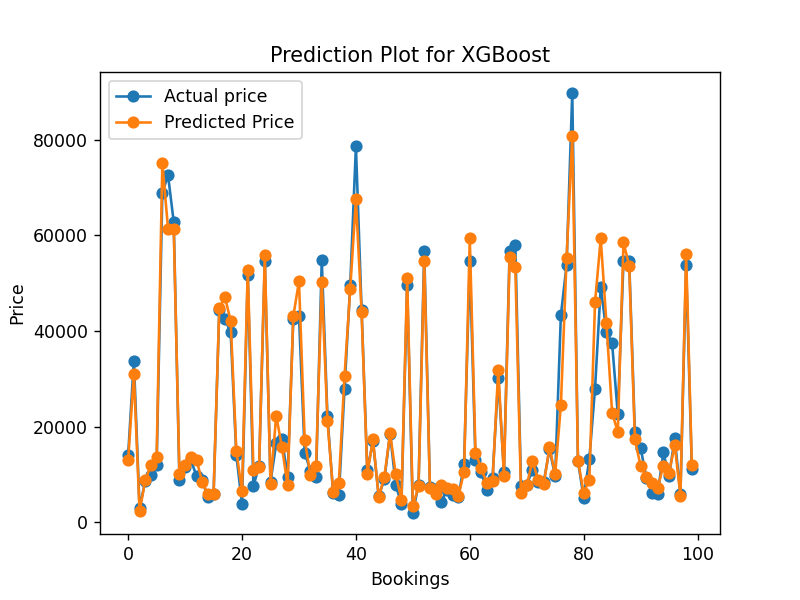

In [44]:
# Plot first 100 samples from y_test and y_pred

xp = np.arange(100)
y_test_plot = y_test[:100] 
y_pred_plot = y_pred[:100]

plt.figure()

plt.plot(xp, y_test_plot, '-o', y_pred_plot, '-o')

plt.xlabel('Bookings')
plt.ylabel('Price')
plt.title('Prediction Plot for XGBoost')
plt.legend(['Actual price', 'Predicted Price'])
plt.savefig('Result.jpg')
plt.show()

<IPython.core.display.Javascript object>


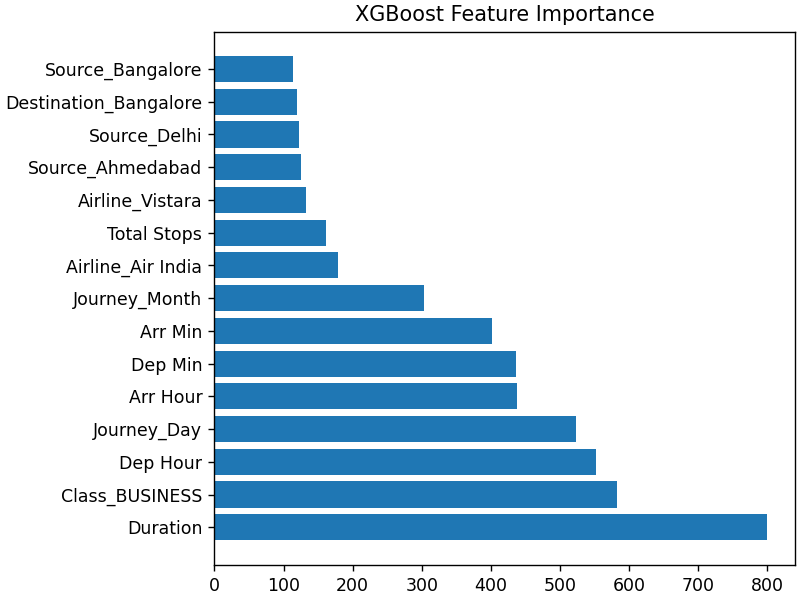

In [45]:
# Let us plot top 15 Important Features 

# Get feature importance data
importance = model.get_booster().get_score(importance_type='weight')

imp_feat = pd.Series(importance.values(), index=importance.keys())
imp_feat1 = imp_feat.sort_values(ascending=False)
imp_feat2 = imp_feat1.iloc[:15]

plt.figure(constrained_layout=True)
xval = range(len(imp_feat2))
plt.barh(xval, imp_feat2, tick_label=imp_feat2.index)
plt.title('XGBoost Feature Importance')
plt.savefig('Imp_Features.jpg')
plt.show()